In [5]:
from src.api.tradier import TradierAPI
from src.api.yfinance import YFinanceAPI
import matplotlib.pyplot as plt
import numpy.polynomial.polynomial as poly
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None
import time

In [6]:
data = {'results': {'MSFT': 0.30998930252821083, 'AAPL': 0.45986969959891955, 'AMD': 0.4436530013625027, 'ROKU': 0.6383278017429453, 'AAL': 0.020126506681746575, 'BAC': 0.27061825160019337, 'DIS': 0.4783270755176801, 'BA': 0.20500419055067387, 'UBER': 0.43186334973851515, 'MU': 0.353385610670714, 'WORK': 0.19513213727703294, 'SQ': 0.475829714175571, 'FSLY': 0.4952733563840284, 'PLUG': 0.6619232075519906, 'TSLA': 0.8452593052727408, 'AMZN': 0.553629103223846, 'NIO': 0.8299912708259227, 'KODK': 0.6625445943987254, 'CCL': 0.3555933755464065, 'WFC': 0.1958849963308288, 'DAL': 0.3890932458276268, 'INTC': 0.488709593539049, 'SPCE': 0.21745090680402399, 'MGM': 0.4695089134692929, 'JPM': 0.210513187580172, 'ZNGA': 0.30245683398870316, 'SNAP': 0.5372337593063891, 'BABA': 0.5093655862685225, 'F': 0.26718166208567323, 'FCX': 0.6932176426457582, 'FB': 0.495833945155795, 'WDC': 0.2653897034697106, 'UAL': 0.20693084712417611, 'ATVI': 0.43425342749575635, 'BMY': 0.2675435350626673, 'PFE': 0.309827893274422, 'WYNN': 0.27261602150190267, 'ET': 0.48100086582718243, 'NFLX': 0.3020451290046911, 'WMT': 0.4782266768925572, 'NVDA': 0.42432316831223527, 'TWTR': 0.5375618427478099, 'PENN': 0.9208565537218544, 'ETSY': 0.541659792317573, 'NCLH': 0.3761975523262279, 'CGC': 0.18714717967429148, 'HPE': 0.13803218102702078, 'GE': 0.23932598536390473, 'LYFT': 0.13351127398176957, 'CRON': 0.31080193862649974, 'SONO': 0.5355021828575245, 'BYND': 0.4870236690675906, 'CRM': 0.46090961159470556, 'JD': 0.5177816400050078, 'T': 0.49859997460035405, 'GM': 0.42545986541832925, 'GOLD': 0.42663116876875823, 'TDOC': 0.21187202156555696, 'FISV': 0.29362827002564545, 'CWH': 0.5388808722239218, 'SRNE': 0.7793195275121354, 'ZM': 0.9610104256213491, 'CVNA': 0.6059521566389373, 'CVS': 0.4201990748654902, 'DKNG': 0.9417688268757421, 'LUV': 0.4620589358104133, 'MRNA': 0.37751836307007963, 'KO': 0.3979383991547057, 'RIOT': 0.5560542192127014, 'GILD': 0.42189686882820493, 'C': 0.44085067302303466, 'Z': 0.8981144695836635, 'OPK': 0.41904764998767424, 'INO': 0.3484104154869309, 'V': 0.2080993915752006, 'COST': 0.3359610481084221, 'VZ': 0.4863999626537014, 'TLRY': 0.6515443988205282, 'DDOG': 0.47953664887951813, 'VIAC': 0.7231835058008448, 'BHC': 0.3849862481728143, 'LVS': 0.24249308361231062, 'DBX': 0.24581752796022127, 'INSG': 0.4234611884825032, 'WKHS': 0.9848437562666094, 'AUY': 0.25214727342915305, 'PYPL': 0.508434779445689, 'CSCO': 0.3359141008427744, 'SBUX': 0.3806337100725256, 'CMCSA': 0.5950718201035459, 'MCD': 0.6694798007021197, 'IBM': 0.16788708407392297, 'MA': 0.2704148131161282, 'TWLO': 0.28433155161918905, 'TSM': 0.4859204629745284, 'KNDI': 0.6116638547608361, 'JNJ': 0.10964035306406021, 'NOK': 0.4224010975192418, 'XOM': 0.548438757821874, 'QCOM': 0.3345975390706782, 'PTON': 0.6597953988716042, 'GSX': 0.6502128984227148, 'GOOGL': 0.4215695441886247, 'PBR': 0.24169555919701724, 'MARA': 0.6144676995950729, 'CZR': 0.834512340421643, 'CTL': 0.2763572474036145, 'NET': 0.6366580261859421, 'PINS': 0.6053555294676906, 'NVAX': 0.7499424226563342, 'MRVL': 0.45078890137166083, 'WLL': 0.7948641497085838, 'COMM': 0.1990874033144329, 'PVG': 0.6616125365941724, 'GS': 0.43966595300292766, 'PCG': 0.4551576630488608, 'TMUS': 0.39018944277714257, 'OXY': 0.46122557529915253, 'MRK': 0.27880714237034643, 'W': 0.7198322700696688, 'NYMT': 0.41898826514357207, 'RCL': 0.6449752119062225, 'LULU': 0.5427179790077427, 'DOCU': 0.425869760712075, 'CRWD': 0.8138741489660966, 'AG': 0.2126847308687558, 'FEYE': 0.44047547560402217, 'MVIS': 0.787880903367928, 'GOOG': 0.4229991524403098, 'ELY': 0.5876567863178933, 'MOMO': 0.3642832359376893, 'VALE': 0.3124968282440926, 'BRK.B': 0.5081478912179199, 'ADBE': 0.3527992284567556, 'IVR': 0.30552681200199544, 'MRO': 0.5101575624282028, 'FTCH': 0.6744528292826283, 'TGT': 0.5809203843994792, 'EBAY': 0.5607929474990108, 'MFA': 0.3970063586097699, 'PPG': 0.5049311940631259, 'KGC': 0.5280341167312259, 'EXPE': 0.5481595717728258, 'OSTK': 0.6459608452420137, 'SAVE': 0.32764194806945185, 'ABBV': 0.3021641042107949, 'CCJ': 0.13656383140727543, 'SHOP': 0.3737108490249508, 'MS': 0.3643788125102347, 'LVGO': 0.4640247039806973, 'AMAT': 0.498657020160419, 'CHNG': 0.4835541203802534, 'NEM': 0.23060973461393805, 'HL': 0.4140634605860485, 'HUYA': 0.4423703423622191, 'TTD': 0.5231410649456371, 'APPS': 0.7992980665617752, 'AER': 0.45147447159194093, 'TPR': 0.395562399128848, 'PBI': 0.6937883513766286, 'HD': 0.33281567393356476, 'TEVA': 0.5767195543727626, 'M': 0.31653725715259673, 'ADT': 0.6911970783474244, 'SPOT': 0.46593374199502663, 'BP': 0.7051577437967101, 'AZN': 0.35509212989451183, 'AGNC': 0.5625305593708335, 'NKE': 0.5342329333607024, 'PAAS': 0.3233625517038316, 'LOW': 0.4440844518259575, 'BILI': 0.2750488068661033, 'AMC': 0.3602602895558333, 'COF': 0.38393551982589424, 'HTZ': 0.5674361010419463, 'MAXR': 0.6445299179263347, 'FLIR': 0.6217206423240588, 'ENPH': 0.3682392683205866, 'RTX': 0.2428443947676879, 'UPS': 0.4917429277263394, 'BIDU': 0.44975025570837396, 'PRPL': 0.3864360766674328, 'PDD': 0.47331903966707994, 'NOW': 0.4144827343579322, 'BBBY': 0.5566623885964336, 'X': 0.23641515662923698, 'FNKO': 0.17862285360558938, 'CAT': 0.5375563351157544, 'UNH': 0.40835437074702, 'CLVS': 0.613960873201053, 'HPQ': 0.5250558707218898, 'TXMD': 0.4956560676320818, 'PLAY': 0.37705104957163504, 'SDC': 0.4701500874514011, 'CVX': 0.5721381813223313, 'SPG': 0.07881610070040346, 'RIG': 0.2638959756425909, 'WIX': 0.3463964621603372, 'CHGG': 0.3657899487950938, 'VAPO': 0.3382717812365466, 'PAGS': 0.37924890255891874, 'CHWY': 0.45135146039736745, 'HMHC': 0.662327265103517, 'JMIA': 0.6886940714371113, 'DG': 0.6404465455526016, 'EMAN': 0.4656835195758788, 'EDIT': 0.6057057655272179, 'AMRN': 0.3692878835205356, 'ORCL': 0.7384452262227171, 'CLF': 0.3902827519647776, 'JBLU': 0.2739663368519565, 'WTRH': 0.4982127768702795, 'XLNX': 0.40712215890874354, 'GPRO': 0.37912874627259036, 'QRTEA': 0.33963224094108274, 'AIG': 0.2745658231161715, 'MO': 0.5370833416611749, 'CF': 0.367050955732576, 'IDEX': 0.6237077427469006, 'VSTO': 0.6721317817539637, 'BCRX': 0.3590405534865857, 'TRIP': 0.3343308195668599, 'BLMN': 0.6799796044418095, 'FCEL': 0.3001036302412415, 'MAR': 0.20498774087929708, 'XSPA': 0.36480456248211657, 'NLOK': 0.4650523067721178, 'KR': 0.4395548341694348, 'CDE': 0.3534136972896889, 'GBT': 0.37717448606035736, 'IQ': 0.5354427651684782, 'NAK': 0.22281630176269177, 'VOD': 0.5631148825543475, 'TTWO': 0.5933485845557877, 'PEP': 0.41674604990223485, 'CLX': 0.5379944986514157, 'BB': 0.11537916700208412, 'STZ': 0.4328400928916787, 'CTVA': 0.3162818646430096, 'WPM': 0.37367049310211353, 'WBA': 0.5216743241166809, 'STNG': 0.22120842098897156, 'HAL': 0.48708405798140336, 'EOG': 0.46901971684799904, 'SGMO': 0.29455842840636365, 'DD': 0.35411256296015226, 'BKNG': 0.4395188691662469, 'GNUS': 0.444092162099372, 'ABUS': 0.646330256602825, 'AVGO': 0.5796738058402652, 'TRVN': 0.6649534186410255, 'YETI': 0.640164713280006, 'MDT': 0.44432744889574444, 'GEO': 0.125197467723433, 'SPWR': 0.5991338321110852, 'CAR': 0.6121533369383712, 'CENX': 0.432837843370568, 'AXP': 0.18193854751438074, 'APRN': 0.2641040422649344, 'MMM': 0.2921252968138727, 'CODX': 0.38029222105606486, 'EVRI': 0.6923870611419579, 'OKTA': 0.14653631570700631, 'JWN': 0.3816832281781897, 'KSU': 0.4018069905206592, 'APHA': 0.188674035428216, 'MPC': 0.31820275801398135, 'ZS': 0.38434461726567765, 'OSUR': 0.4252368288255551, 'GME': 0.8515649786591241, 'APA': 0.333899345990114, 'ACAD': 0.4179228036014675, 'GLUU': 0.5057510991366977, 'BTG': 0.35309133516104424, 'CHRW': 0.795217820380086, 'MET': 0.18873201037735213, 'FDX': 0.8879444342228903, 'ADMA': 0.36723719348416567, 'DVAX': 0.3613127131157417, 'STX': 0.6338844699242919, 'TXN': 0.3233793802961778, 'BLNK': 0.7430053872114923, 'GDDY': 0.4048338654924299, 'KSS': 0.06925329286850829, 'EA': 0.35901285559183876, 'VLO': 0.4755245162404457, 'LILAK': 0.4444961529020956, 'DB': 0.34708773473831367, 'CAH': 0.5445701544674694, 'KHC': 0.5437355235460276, 'DDD': 0.5207536297058287, 'CXW': 0.4965680781035855, 'SAND': 0.13661458094910864, 'ABT': 0.6256108937562789, 'HZNP': 0.6541633291281078, 'APT': 0.3479695975255826, 'PG': 0.42752929565845427, 'OLED': 0.4811923128642837, 'UPWK': 0.48968078618190186, 'YELP': 0.27913560247218144, 'HSBC': 0.7221661967515441, 'PSTI': 0.2994178000681065, 'KL': 0.40706089365490933, 'NVTA': 0.8827522304198352, 'AMRS': 0.2982524212674486, 'HES': 0.47992080719783226, 'WMB': 0.3296827638064697, 'RUN': 0.8756533642483514, 'ADSK': 0.1939224010467525, 'NAT': 0.41354234504888776, 'CCXI': 0.5001695727467864, 'HLT': 0.34447012477765315, 'EURN': 0.23944838279539984, 'RIO': 0.4282924598230962, 'FE': 0.23087089829419596, 'ALB': 0.6405595898771858, 'FSLR': 0.532265280112067, 'CRBP': 0.2974959341632426, 'GPS': 0.6484948414525796, 'AA': 0.7136677489946254, 'LRN': 0.7388765933522056, 'SWKS': 0.39251278345738433, 'OMI': 0.6949583679642387, 'BRFS': 0.17953680405306996, 'MELI': 0.5786181515114209, 'EHTH': 0.5461004078347617, 'URI': 0.3151184905885988, 'ZG': 0.8929172724727451, 'KMI': 0.523863295605316, 'COTY': 0.6456856204900007, 'MIK': 0.6410636307833218, 'MTCH': 0.6010798557601388, 'SLB': 0.19699282703174123, 'USFD': 0.41908511765011086, 'ACB': 0.8116601626649058, 'AYX': 0.09636356391276317, 'ULTA': 0.18656825204312014, 'BYD': 0.460060993050484, 'EPD': 0.6555516143688527, 'FIT': 0.06626559201277032, 'NTAP': 0.2386893564070387, 'BE': 0.6246291701630993, 'ARLO': 0.5375739103921601, 'LRCX': 0.6040757246323502, 'FTAI': 0.5493993279380219, 'MOS': 0.47108893283803094, 'FOXA': 0.3060148041555174, 'VXRT': 0.7604151857735811, 'GNMK': 0.5419199895865013, 'PEIX': 0.9932809482093874, 'ALLY': 0.7292909677994232, 'RMD': 0.15123083935641277, 'TWOU': 0.37253406957159235, 'DVN': 0.41063982983818564, 'VNO': 0.10979554699318672, 'BDX': 0.43500993617092293, 'CMG': 0.6832774490249331, 'FSM': 0.6911262819815457, 'ADI': 0.12746012237644885, 'CNK': 0.3043599713924004, 'MYL': 0.2045398017814873, 'CNQ': 0.35564357660538803, 'GNW': 0.33687838967836786, 'PHM': 0.413773380685716, 'INFN': 0.5660441211081843, 'IAG': 0.11866638973665215, 'CELH': 0.590690006245333, 'MARK': 0.5409375757212095, 'RUTH': 0.387826106048857, 'DISH': 0.4059409340920935, 'VNET': 0.2781898422904529, 'TER': 0.48757641882456765, 'HEAR': 0.3600518445383563, 'LBTYK': 0.14335783620725948, 'CDAY': 0.15015481661324118, 'ITUB': 0.17614079667124152, 'LLY': 0.14039087611828036, 'CPRI': 0.5190920718395255, 'PZZA': 0.5384571608239797, 'PRTY': 0.9025856695489903, 'HEXO': 0.19179507667255416, 'VICI': 0.3728824639748298, 'CI': 0.6904854868809017, 'IMMU': 1.0, 'TSN': 0.08098428382905663, 'STMP': 0.5262627132701799, 'STM': 0.46826261515190465, 'BUD': 0.2594370899277173, 'EXK': 0.44001731366563307, 'LYV': 0.42380877744983675, 'PSX': 0.4773110617294451, 'ACIA': 0.11224722722046913, 'AU': 0.15394572147210558, 'CSX': 0.6231103431929582, 'HOLX': 0.6490775314946727, 'BJ': 0.3860306882492575, 'GLW': 0.31432196326603573, 'ANET': 0.37847886995800123, 'RAD': 0.4877479404221589, 'SCHW': 0.23230376247718876, 'HON': 0.4437372728521592, 'ARWR': 0.2963238579580593, 'SOLO': 0.4489718673055238, 'XRAY': 0.22309460789733637, 'OAS': 0.31951459024038936, 'GSK': 0.4178400655885217, 'CARS': 0.37353487325027457, 'ENDP': 0.5454473893780675, 'SKT': 0.27115327859748795, 'DE': 0.7225362778460749, 'ERIC': 0.4747332873566097, 'THC': 0.30921980304428826, 'SFIX': 0.5526182701075718, 'OKE': 0.445212589229475, 'FTNT': 0.3689057526958169, 'AES': 0.7025337542247329, 'SEDG': 0.471681212322608, 'IRM': 0.5503535693760451, 'DCP': 0.5323960768845293, 'NUAN': 0.8750337096015507, 'FRO': 0.4713329259745866, 'AEG': 0.37072753160902977, 'AKAM': 0.301049276742128, 'DLTR': 0.5514125788870607, 'MAC': 0.20651969950084956, 'DFS': 0.393977782049801, 'PLNT': 0.20256289766145982, 'BNTX': 0.43031128535161534, 'REGN': 0.21832796049753952, 'CPA': 0.5729691311489669, 'BTU': 0.5750507340824268, 'RST': 0.5636616718557496, 'ZTS': 0.5360398532664075, 'EROS': 0.30716076970469525, 'MLCO': 0.34483250723891135, 'WRTC': 0.5489500413809392, 'NLY': 0.31596108405346374, 'ADTN': 0.3821962466973639, 'COP': 0.6028083110534549, 'AMGN': 0.2968443584060036, 'CEMI': 0.5318243232612113, 'AXTA': 0.22655157176419116, 'OLN': 0.3962233315397474, 'ALRM': 0.152941753396598, 'SPPI': 0.7810831602413114, 'TJX': 0.12273764757242489, 'BLDP': 0.5264046774638116, 'TTOO': 0.6415203824904564, 'ICHR': 0.4498557194883461, 'SO': 0.23733458733114268, 'VBIV': 0.4328629292264838, 'PDCE': 0.35002879645462914, 'ZVO': 0.7562206939595636, 'NEWR': 0.16784028869902964, 'WW': 0.620070566254672, 'PAYC': 0.16488864574700757, 'AMSC': 0.41142416035262847, 'ATNM': 0.5307495481519453, 'ORC': 0.33674414216026366, 'PANW': 0.4602572665383747, 'LCA': 0.7082291227482763, 'BAX': 0.165897082247026, 'MCRB': 0.5708299229891703, 'UN': 0.44298336210408196, 'WELL': 0.4372265415516588, 'VMW': 0.14101678124822928, 'DHI': 0.5282672897025552, 'TEN': 0.5674717905924108, 'TWO': 0.35013308084565326, 'RCII': 0.576799180875205, 'MITT': 0.3541771218215519, 'AAWW': 0.5843877322639862, 'TEAM': 0.15770789089592266, 'DXCM': 0.2601928982938251, 'WDAY': 0.5609259662929408, 'BPY': 0.3161398185675959, 'LB': 0.6035639426312418, 'ALK': 0.3006898624698103, 'SNE': 0.6344093457987056, 'MCHP': 0.11243190713561912, 'VSLR': 0.8749067437685492, 'CIEN': 0.34801840910746645, 'UAA': 0.3433461820551762, 'VIRT': 0.603766323051837, 'BOX': 0.13278568423814854, 'CLDR': 0.2064283680586225, 'ARR': 0.2839886323427507, 'SKX': 0.10790053771498591, 'SYF': 0.5928610923841752, 'PRGO': 0.3902741553494973, 'FNV': 0.21857306430678478, 'BBY': 0.37222338665003435, 'TNDM': 0.38474071739572135, 'TRXC': 0.4209430844711957, 'SYY': 0.6015568064145366, 'DXC': 0.4391752643405084, 'BIIB': 0.2872038642169186}, 'fetch_failure_count': 0, 'analyzer_failure_count': 0}
data = data['results']

In [9]:
fmt_data = np.array([(k, v) for k, v in data.items()])
df = pd.DataFrame(fmt_data[:, 1], index=fmt_data[:, 0], columns=['score'])
df = df.sort_values('score', ascending=False)
df

,score
IMMU,1.0
PEIX,0.9932809482093874
WKHS,0.9848437562666094
ZM,0.9610104256213491
DKNG,0.9417688268757421
...,...
TSN,0.08098428382905663
SPG,0.07881610070040346
KSS,0.06925329286850829
FIT,0.06626559201277032


In [170]:
data = [{'symbol': 'CHNG201120P00010000', 'description': 'CHNG Nov 20 2020 $10.00 Put', 'exch': 'Z', 'type': 'option', 'last': None, 'change': None, 'volume': 0, 'open': None, 'high': None, 'low': None, 'close': None, 'bid': 0.06, 'ask': 0.23, 'underlying': 'CHNG', 'strike': 10.0, 'change_percentage': None, 'average_volume': 0, 'last_volume': 0, 'trade_date': 0, 'prevclose': None, 'week_52_high': 0.0, 'week_52_low': 0.0, 'bidsize': 70, 'bidexch': 'P', 'bid_date': 1600459197000, 'asksize': 26, 'askexch': 'Z', 'ask_date': 1600459197000, 'open_interest': 0, 'contract_size': 100, 'expiration_date': '2020-11-20', 'expiration_type': 'standard', 'option_type': 'put', 'root_symbol': 'CHNG'}, {'symbol': 'CHNG201120C00010000', 'description': 'CHNG Nov 20 2020 $10.00 Call', 'exch': 'Z', 'type': 'option', 'last': None, 'change': None, 'volume': 0, 'open': None, 'high': None, 'low': None, 'close': None, 'bid': 2.5, 'ask': 6.75, 'underlying': 'CHNG', 'strike': 10.0, 'change_percentage': None, 'average_volume': 0, 'last_volume': 0, 'trade_date': 0, 'prevclose': None, 'week_52_high': 0.0, 'week_52_low': 0.0, 'bidsize': 40, 'bidexch': 'X', 'bid_date': 1600459089000, 'asksize': 48, 'askexch': 'B', 'ask_date': 1600459087000, 'open_interest': 0, 'contract_size': 100, 'expiration_date': '2020-11-20', 'expiration_type': 'standard', 'option_type': 'call', 'root_symbol': 'CHNG'}, {'symbol': 'CHNG201120P00011000', 'description': 'CHNG Nov 20 2020 $11.00 Put', 'exch': 'Z', 'type': 'option', 'last': None, 'change': None, 'volume': 0, 'open': None, 'high': None, 'low': None, 'close': None, 'bid': 0.0, 'ask': 4.25, 'underlying': 'CHNG', 'strike': 11.0, 'change_percentage': None, 'average_volume': 0, 'last_volume': 0, 'trade_date': 0, 'prevclose': None, 'week_52_high': 0.0, 'week_52_low': 0.0, 'bidsize': 0, 'bidexch': 'B', 'bid_date': 1600459107000, 'asksize': 267, 'askexch': 'X', 'ask_date': 1600459108000, 'open_interest': 0, 'contract_size': 100, 'expiration_date': '2020-11-20', 'expiration_type': 'standard', 'option_type': 'put', 'root_symbol': 'CHNG'}, {'symbol': 'CHNG201120C00011000', 'description': 'CHNG Nov 20 2020 $11.00 Call', 'exch': 'Z', 'type': 'option', 'last': None, 'change': None, 'volume': 0, 'open': None, 'high': None, 'low': None, 'close': None, 'bid': 1.0, 'ask': 5.3, 'underlying': 'CHNG', 'strike': 11.0, 'change_percentage': None, 'average_volume': 0, 'last_volume': 0, 'trade_date': 0, 'prevclose': None, 'week_52_high': 0.0, 'week_52_low': 0.0, 'bidsize': 2, 'bidexch': 'P', 'bid_date': 1600459192000, 'asksize': 51, 'askexch': 'Z', 'ask_date': 1600459191000, 'open_interest': 0, 'contract_size': 100, 'expiration_date': '2020-11-20', 'expiration_type': 'standard', 'option_type': 'call', 'root_symbol': 'CHNG'}, {'symbol': 'CHNG201120P00012000', 'description': 'CHNG Nov 20 2020 $12.00 Put', 'exch': 'Z', 'type': 'option', 'last': None, 'change': None, 'volume': 0, 'open': None, 'high': None, 'low': None, 'close': None, 'bid': 0.0, 'ask': 0.79, 'underlying': 'CHNG', 'strike': 12.0, 'change_percentage': None, 'average_volume': 0, 'last_volume': 0, 'trade_date': 0, 'prevclose': None, 'week_52_high': 0.0, 'week_52_low': 0.0, 'bidsize': 0, 'bidexch': 'P', 'bid_date': 1600459167000, 'asksize': 172, 'askexch': 'B', 'ask_date': 1600459167000, 'open_interest': 0, 'contract_size': 100, 'expiration_date': '2020-11-20', 'expiration_type': 'standard', 'option_type': 'put', 'root_symbol': 'CHNG'}, {'symbol': 'CHNG201120C00012000', 'description': 'CHNG Nov 20 2020 $12.00 Call', 'exch': 'Z', 'type': 'option', 'last': None, 'change': None, 'volume': 0, 'open': None, 'high': None, 'low': None, 'close': None, 'bid': 0.7, 'ask': 4.75, 'underlying': 'CHNG', 'strike': 12.0, 'change_percentage': None, 'average_volume': 0, 'last_volume': 0, 'trade_date': 0, 'prevclose': None, 'week_52_high': 0.0, 'week_52_low': 0.0, 'bidsize': 27, 'bidexch': 'X', 'bid_date': 1600459199000, 'asksize': 172, 'askexch': 'B', 'ask_date': 1600459078000, 'open_interest': 0, 'contract_size': 100, 'expiration_date': '2020-11-20', 'expiration_type': 'standard', 'option_type': 'call', 'root_symbol': 'CHNG'}, {'symbol': 'CHNG201120P00013000', 'description': 'CHNG Nov 20 2020 $13.00 Put', 'exch': 'Z', 'type': 'option', 'last': None, 'change': None, 'volume': 0, 'open': None, 'high': None, 'low': None, 'close': None, 'bid': 0.0, 'ask': 0.97, 'underlying': 'CHNG', 'strike': 13.0, 'change_percentage': None, 'average_volume': 0, 'last_volume': 0, 'trade_date': 0, 'prevclose': None, 'week_52_high': 0.0, 'week_52_low': 0.0, 'bidsize': 0, 'bidexch': 'Z', 'bid_date': 1600459136000, 'asksize': 58, 'askexch': 'A', 'ask_date': 1600459198000, 'open_interest': 0, 'contract_size': 100, 'expiration_date': '2020-11-20', 'expiration_type': 'standard', 'option_type': 'put', 'root_symbol': 'CHNG'}, {'symbol': 'CHNG201120C00013000', 'description': 'CHNG Nov 20 2020 $13.00 Call', 'exch': 'Z', 'type': 'option', 'last': None, 'change': None, 'volume': 0, 'open': None, 'high': None, 'low': None, 'close': None, 'bid': 0.01, 'ask': 2.67, 'underlying': 'CHNG', 'strike': 13.0, 'change_percentage': None, 'average_volume': 0, 'last_volume': 0, 'trade_date': 0, 'prevclose': None, 'week_52_high': 0.0, 'week_52_low': 0.0, 'bidsize': 58, 'bidexch': 'Q', 'bid_date': 1600459139000, 'asksize': 108, 'askexch': 'X', 'ask_date': 1600459120000, 'open_interest': 0, 'contract_size': 100, 'expiration_date': '2020-11-20', 'expiration_type': 'standard', 'option_type': 'call', 'root_symbol': 'CHNG'}, {'symbol': 'CHNG201120P00014000', 'description': 'CHNG Nov 20 2020 $14.00 Put', 'exch': 'Z', 'type': 'option', 'last': None, 'change': None, 'volume': 0, 'open': None, 'high': None, 'low': None, 'close': None, 'bid': 0.0, 'ask': 4.3, 'underlying': 'CHNG', 'strike': 14.0, 'change_percentage': None, 'average_volume': 0, 'last_volume': 0, 'trade_date': 0, 'prevclose': None, 'week_52_high': 0.0, 'week_52_low': 0.0, 'bidsize': 0, 'bidexch': 'B', 'bid_date': 1600459018000, 'asksize': 82, 'askexch': 'A', 'ask_date': 1600459198000, 'open_interest': 0, 'contract_size': 100, 'expiration_date': '2020-11-20', 'expiration_type': 'standard', 'option_type': 'put', 'root_symbol': 'CHNG'}, {'symbol': 'CHNG201120C00014000', 'description': 'CHNG Nov 20 2020 $14.00 Call', 'exch': 'Z', 'type': 'option', 'last': None, 'change': None, 'volume': 0, 'open': None, 'high': None, 'low': None, 'close': None, 'bid': 0.0, 'ask': 4.4, 'underlying': 'CHNG', 'strike': 14.0, 'change_percentage': None, 'average_volume': 0, 'last_volume': 0, 'trade_date': 0, 'prevclose': None, 'week_52_high': 0.0, 'week_52_low': 0.0, 'bidsize': 0, 'bidexch': 'B', 'bid_date': 1600459191000, 'asksize': 339, 'askexch': 'X', 'ask_date': 1600459102000, 'open_interest': 0, 'contract_size': 100, 'expiration_date': '2020-11-20', 'expiration_type': 'standard', 'option_type': 'call', 'root_symbol': 'CHNG'}, {'symbol': 'CHNG201120P00015000', 'description': 'CHNG Nov 20 2020 $15.00 Put', 'exch': 'Z', 'type': 'option', 'last': None, 'change': None, 'volume': 0, 'open': None, 'high': None, 'low': None, 'close': None, 'bid': 0.03, 'ask': 4.2, 'underlying': 'CHNG', 'strike': 15.0, 'change_percentage': None, 'average_volume': 0, 'last_volume': 0, 'trade_date': 0, 'prevclose': None, 'week_52_high': 0.0, 'week_52_low': 0.0, 'bidsize': 10, 'bidexch': 'M', 'bid_date': 1600459198000, 'asksize': 244, 'askexch': 'X', 'ask_date': 1600459185000, 'open_interest': 0, 'contract_size': 100, 'expiration_date': '2020-11-20', 'expiration_type': 'standard', 'option_type': 'put', 'root_symbol': 'CHNG'}, {'symbol': 'CHNG201120C00015000', 'description': 'CHNG Nov 20 2020 $15.00 Call', 'exch': 'Z', 'type': 'option', 'last': 1.5, 'change': -0.01, 'volume': 10, 'open': 1.5, 'high': 1.5, 'low': 1.5, 'close': 1.5, 'bid': 0.0, 'ask': 4.15, 'underlying': 'CHNG', 'strike': 15.0, 'change_percentage': -0.67, 'average_volume': 0, 'last_volume': 10, 'trade_date': 1600438067261, 'prevclose': 1.51, 'week_52_high': 0.0, 'week_52_low': 0.0, 'bidsize': 0, 'bidexch': 'D', 'bid_date': 1600459080000, 'asksize': 297, 'askexch': 'X', 'ask_date': 1600459086000, 'open_interest': 20, 'contract_size': 100, 'expiration_date': '2020-11-20', 'expiration_type': 'standard', 'option_type': 'call', 'root_symbol': 'CHNG'}, {'symbol': 'CHNG201120C00016000', 'description': 'CHNG Nov 20 2020 $16.00 Call', 'exch': 'Z', 'type': 'option', 'last': None, 'change': None, 'volume': 0, 'open': None, 'high': None, 'low': None, 'close': None, 'bid': 0.0, 'ask': 1.1, 'underlying': 'CHNG', 'strike': 16.0, 'change_percentage': None, 'average_volume': 0, 'last_volume': 0, 'trade_date': 0, 'prevclose': None, 'week_52_high': 0.0, 'week_52_low': 0.0, 'bidsize': 0, 'bidexch': 'B', 'bid_date': 1600458994000, 'asksize': 58, 'askexch': 'A', 'ask_date': 1600459198000, 'open_interest': 0, 'contract_size': 100, 'expiration_date': '2020-11-20', 'expiration_type': 'standard', 'option_type': 'call', 'root_symbol': 'CHNG'}, {'symbol': 'CHNG201120P00016000', 'description': 'CHNG Nov 20 2020 $16.00 Put', 'exch': 'Z', 'type': 'option', 'last': None, 'change': None, 'volume': 0, 'open': None, 'high': None, 'low': None, 'close': None, 'bid': 0.0, 'ask': 2.32, 'underlying': 'CHNG', 'strike': 16.0, 'change_percentage': None, 'average_volume': 0, 'last_volume': 0, 'trade_date': 0, 'prevclose': None, 'week_52_high': 0.0, 'week_52_low': 0.0, 'bidsize': 0, 'bidexch': 'Q', 'bid_date': 1600459194000, 'asksize': 98, 'askexch': 'B', 'ask_date': 1600459152000, 'open_interest': 0, 'contract_size': 100, 'expiration_date': '2020-11-20', 'expiration_type': 'standard', 'option_type': 'put', 'root_symbol': 'CHNG'}, {'symbol': 'CHNG201120P00017000', 'description': 'CHNG Nov 20 2020 $17.00 Put', 'exch': 'Z', 'type': 'option', 'last': None, 'change': None, 'volume': 0, 'open': None, 'high': None, 'low': None, 'close': None, 'bid': 0.0, 'ask': 4.25, 'underlying': 'CHNG', 'strike': 17.0, 'change_percentage': None, 'average_volume': 0, 'last_volume': 0, 'trade_date': 0, 'prevclose': None, 'week_52_high': 0.0, 'week_52_low': 0.0, 'bidsize': 0, 'bidexch': 'Z', 'bid_date': 1600459191000, 'asksize': 243, 'askexch': 'X', 'ask_date': 1600459106000, 'open_interest': 0, 'contract_size': 100, 'expiration_date': '2020-11-20', 'expiration_type': 'standard', 'option_type': 'put', 'root_symbol': 'CHNG'}, {'symbol': 'CHNG201120C00017000', 'description': 'CHNG Nov 20 2020 $17.00 Call', 'exch': 'Z', 'type': 'option', 'last': None, 'change': None, 'volume': 0, 'open': None, 'high': None, 'low': None, 'close': None, 'bid': 0.0, 'ask': 4.2, 'underlying': 'CHNG', 'strike': 17.0, 'change_percentage': None, 'average_volume': 0, 'last_volume': 0, 'trade_date': 0, 'prevclose': None, 'week_52_high': 0.0, 'week_52_low': 0.0, 'bidsize': 0, 'bidexch': 'P', 'bid_date': 1600459159000, 'asksize': 57, 'askexch': 'M', 'ask_date': 1600459191000, 'open_interest': 0, 'contract_size': 100, 'expiration_date': '2020-11-20', 'expiration_type': 'standard', 'option_type': 'call', 'root_symbol': 'CHNG'}, {'symbol': 'CHNG201120P00018000', 'description': 'CHNG Nov 20 2020 $18.00 Put', 'exch': 'Z', 'type': 'option', 'last': None, 'change': None, 'volume': 0, 'open': None, 'high': None, 'low': None, 'close': None, 'bid': 1.0, 'ask': 5.3, 'underlying': 'CHNG', 'strike': 18.0, 'change_percentage': None, 'average_volume': 0, 'last_volume': 0, 'trade_date': 0, 'prevclose': None, 'week_52_high': 0.0, 'week_52_low': 0.0, 'bidsize': 21, 'bidexch': 'X', 'bid_date': 1600459198000, 'asksize': 48, 'askexch': 'Z', 'ask_date': 1600459197000, 'open_interest': 0, 'contract_size': 100, 'expiration_date': '2020-11-20', 'expiration_type': 'standard', 'option_type': 'put', 'root_symbol': 'CHNG'}, {'symbol': 'CHNG201120C00018000', 'description': 'CHNG Nov 20 2020 $18.00 Call', 'exch': 'Z', 'type': 'option', 'last': None, 'change': None, 'volume': 0, 'open': None, 'high': None, 'low': None, 'close': None, 'bid': 0.01, 'ask': 4.3, 'underlying': 'CHNG', 'strike': 18.0, 'change_percentage': None, 'average_volume': 0, 'last_volume': 0, 'trade_date': 0, 'prevclose': None, 'week_52_high': 0.0, 'week_52_low': 0.0, 'bidsize': 1, 'bidexch': 'W', 'bid_date': 1600459197000, 'asksize': 48, 'askexch': 'B', 'ask_date': 1600459197000, 'open_interest': 0, 'contract_size': 100, 'expiration_date': '2020-11-20', 'expiration_type': 'standard', 'option_type': 'call', 'root_symbol': 'CHNG'}, {'symbol': 'CHNG201120P00019000', 'description': 'CHNG Nov 20 2020 $19.00 Put', 'exch': 'Z', 'type': 'option', 'last': None, 'change': None, 'volume': 0, 'open': None, 'high': None, 'low': None, 'close': None, 'bid': 1.5, 'ask': 5.45, 'underlying': 'CHNG', 'strike': 19.0, 'change_percentage': None, 'average_volume': 0, 'last_volume': 0, 'trade_date': 0, 'prevclose': None, 'week_52_high': 0.0, 'week_52_low': 0.0, 'bidsize': 1, 'bidexch': 'B', 'bid_date': 1600459191000, 'asksize': 58, 'askexch': 'Z', 'ask_date': 1600459199000, 'open_interest': 0, 'contract_size': 100, 'expiration_date': '2020-11-20', 'expiration_type': 'standard', 'option_type': 'put', 'root_symbol': 'CHNG'}, {'symbol': 'CHNG201120C00019000', 'description': 'CHNG Nov 20 2020 $19.00 Call', 'exch': 'Z', 'type': 'option', 'last': None, 'change': None, 'volume': 0, 'open': None, 'high': None, 'low': None, 'close': None, 'bid': 0.0, 'ask': 4.25, 'underlying': 'CHNG', 'strike': 19.0, 'change_percentage': None, 'average_volume': 0, 'last_volume': 0, 'trade_date': 0, 'prevclose': None, 'week_52_high': 0.0, 'week_52_low': 0.0, 'bidsize': 0, 'bidexch': 'B', 'bid_date': 1600459083000, 'asksize': 343, 'askexch': 'X', 'ask_date': 1600459102000, 'open_interest': 0, 'contract_size': 100, 'expiration_date': '2020-11-20', 'expiration_type': 'standard', 'option_type': 'call', 'root_symbol': 'CHNG'}, {'symbol': 'CHNG201120P00020000', 'description': 'CHNG Nov 20 2020 $20.00 Put', 'exch': 'Z', 'type': 'option', 'last': None, 'change': None, 'volume': 0, 'open': None, 'high': None, 'low': None, 'close': None, 'bid': 2.5, 'ask': 6.9, 'underlying': 'CHNG', 'strike': 20.0, 'change_percentage': None, 'average_volume': 0, 'last_volume': 0, 'trade_date': 0, 'prevclose': None, 'week_52_high': 0.0, 'week_52_low': 0.0, 'bidsize': 2, 'bidexch': 'P', 'bid_date': 1600459192000, 'asksize': 52, 'askexch': 'B', 'ask_date': 1600459192000, 'open_interest': 0, 'contract_size': 100, 'expiration_date': '2020-11-20', 'expiration_type': 'standard', 'option_type': 'put', 'root_symbol': 'CHNG'}, {'symbol': 'CHNG201120C00020000', 'description': 'CHNG Nov 20 2020 $20.00 Call', 'exch': 'Z', 'type': 'option', 'last': None, 'change': None, 'volume': 0, 'open': None, 'high': None, 'low': None, 'close': None, 'bid': 0.0, 'ask': 0.48, 'underlying': 'CHNG', 'strike': 20.0, 'change_percentage': None, 'average_volume': 0, 'last_volume': 0, 'trade_date': 0, 'prevclose': None, 'week_52_high': 0.0, 'week_52_low': 0.0, 'bidsize': 0, 'bidexch': 'B', 'bid_date': 1600459032000, 'asksize': 210, 'askexch': 'X', 'ask_date': 1600459033000, 'open_interest': 0, 'contract_size': 100, 'expiration_date': '2020-11-20', 'expiration_type': 'standard', 'option_type': 'call', 'root_symbol': 'CHNG'}]

In [171]:
filt_chain = []
underlying = 14.73
for level in data:
    if level['option_type'] != 'put': continue
    if underlying <= level['strike']: continue
#     if not level['last']: continue
    filt_chain.append(level)
print(filt_chain)

[{'symbol': 'CHNG201120P00010000', 'description': 'CHNG Nov 20 2020 $10.00 Put', 'exch': 'Z', 'type': 'option', 'last': None, 'change': None, 'volume': 0, 'open': None, 'high': None, 'low': None, 'close': None, 'bid': 0.06, 'ask': 0.23, 'underlying': 'CHNG', 'strike': 10.0, 'change_percentage': None, 'average_volume': 0, 'last_volume': 0, 'trade_date': 0, 'prevclose': None, 'week_52_high': 0.0, 'week_52_low': 0.0, 'bidsize': 70, 'bidexch': 'P', 'bid_date': 1600459197000, 'asksize': 26, 'askexch': 'Z', 'ask_date': 1600459197000, 'open_interest': 0, 'contract_size': 100, 'expiration_date': '2020-11-20', 'expiration_type': 'standard', 'option_type': 'put', 'root_symbol': 'CHNG'}, {'symbol': 'CHNG201120P00011000', 'description': 'CHNG Nov 20 2020 $11.00 Put', 'exch': 'Z', 'type': 'option', 'last': None, 'change': None, 'volume': 0, 'open': None, 'high': None, 'low': None, 'close': None, 'bid': 0.0, 'ask': 4.25, 'underlying': 'CHNG', 'strike': 11.0, 'change_percentage': None, 'average_volum

In [172]:
api = TradierAPI()
chain, _, _, _ = api.fetch_chain('TSLA', '2020-11-20', greeks=True)

In [173]:
api = YFinanceAPI()
underlying = api.fetch_last_quote('TSLA')

In [174]:
strikes = np.array([l['strike'] for l in chain if l['option_type'] == 'put' and l['strike'] > underlying])
deltas = np.array([l['greeks']['delta'] for l in chain if l['option_type'] == 'put' and l['strike'] > underlying])

In [175]:
now = time.time()
coefs = poly.polyfit(strikes, deltas, 11)
ffit = poly.polyval(strikes, coefs)
then = time.time()
print('Total time: {}ms'.format((then - now) * 1000))

Total time: 0.49591064453125ms


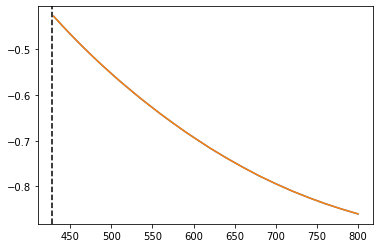

In [176]:
plt.plot(strikes, deltas)
plt.plot(strikes, ffit)
plt.axvline(x=underlying, color='k', linestyle='--')
plt.show()

In [177]:
print(poly.polyval(120.14351345, coefs))

467.80268525851534


In [178]:
data = {28.75: {'iv': 1.8025664518781135, 'delta': -0.0017229639806732716, 'theta': -0.005377622483133024, 'vega': 0.0016095195222112027, 'gamma': 0.00010563869241830975, 'rho': -0.00015837125442354726}, 30.0: {'iv': 1.676384648894698, 'delta': -0.0012805244568474365, 'theta': -0.0038149350200683257, 'vega': 0.0012277233304395566, 'gamma': 8.664527527658126e-05, 'rho': -0.00011600562488696006}, 31.25: {'iv': 1.5234024629727392, 'delta': -0.0007449766163877861, 'theta': -0.0021085385087034813, 'vega': 0.0007466915217206104, 'gamma': 5.798886640254963e-05, 'rho': -6.628011327659689e-05}, 32.5: {'iv': 1.4763316105056736, 'delta': -0.000769580513305691, 'theta': -0.0021055017675595364, 'vega': 0.0007693787503547559, 'gamma': 6.16558544490514e-05, 'rho': -6.822496403126451e-05}, 33.75: {'iv': 1.431080383680067, 'delta': -0.0007947006100846013, 'theta': -0.0021022588738464285, 'vega': 0.000792473358022045, 'gamma': 6.551469057514184e-05, 'rho': -7.021061855342442e-05}, 35.0: {'iv': 1.5416339574484055, 'delta': -0.0020288450371857315, 'theta': -0.005336045753160881, 'vega': 0.001867269188866917, 'gamma': 0.00014329918336733363, 'rho': -0.00018255006664917966}, 37.5: {'iv': 1.3049397413511417, 'delta': -0.0008735514421684998, 'theta': -0.002091369892053968, 'vega': 0.0008645376645745563, 'gamma': 7.838112872417502e-05, 'rho': -7.64434970602822e-05}, 38.75: {'iv': 1.2657284462637195, 'delta': -0.0009011372907702959, 'theta': -0.002087372506916451, 'vega': 0.0008896030036078345, 'gamma': 8.315220155266265e-05, 'rho': -7.862406051534645e-05}, 40.0: {'iv': 1.2277775996099791, 'delta': -0.0009294484004458771, 'theta': -0.002083198047201701, 'vega': 0.00091525216495908, 'gamma': 8.819401446722451e-05, 'rho': -8.086195328500646e-05}, 41.25: {'iv': 1.2710522343211903, 'delta': -0.0017030542970585636, 'theta': -0.0037526159549594864, 'vega': 0.001592580284194121, 'gamma': 0.0001482367855036183, 'rho': -0.00014940510958429102}, 42.5: {'iv': 1.2853724951749999, 'delta': -0.002443972754453234, 'theta': -0.005267045961993511, 'vega': 0.0022103795057775463, 'gamma': 0.00020344915713937359, 'rho': -0.00021536443979117085}, 43.75: {'iv': 1.1963966718668648, 'delta': -0.0018106321641714399, 'theta': -0.0037347897434182814, 'vega': 0.0016838632012958583, 'gamma': 0.00016651358151439737, 'rho': -0.00015790875828425652}, 45.0: {'iv': 1.1606608880708058, 'delta': -0.001866808745317755, 'theta': -0.003725366692332438, 'vega': 0.0017312976847795088, 'gamma': 0.0001764755120366674, 'rho': -0.00016234931770464482}, 46.25: {'iv': 1.1259043544271097, 'delta': -0.001924716294072916, 'theta': -0.003715604014014914, 'vega': 0.0017800325239873856, 'gamma': 0.00018704430563262395, 'rho': -0.0001669267039728938}, 47.5: {'iv': 1.0920717584794366, 'delta': -0.0019844682558861205, 'theta': -0.0037055003325444577, 'vega': 0.0018301527240108459, 'gamma': 0.00019826872265017346, 'rho': -0.0001716498845492492}, 48.75: {'iv': 1.059112145720341, 'delta': -0.0020461863103057787, 'theta': -0.0036950530241254627, 'vega': 0.001881748999694185, 'gamma': 0.00021020246161128274, 'rho': -0.00017652847777028263}, 50.0: {'iv': 1.1056275725961484, 'delta': -0.00369927596850113, 'theta': -0.006582174357378915, 'vega': 0.0032110349626242925, 'gamma': 0.00034360084703353094, 'rho': -0.00032198405993117145}, 51.25: {'iv': 1.0721268248011528, 'delta': -0.0038143644094504148, 'theta': -0.00656064720030613, 'vega': 0.003300470255392677, 'gamma': 0.0003642065173764045, 'rho': -0.0003310813928447583}, 52.5: {'iv': 0.965017879350719, 'delta': -0.002244497902222741, 'theta': -0.0036616048280052236, 'vega': 0.0020464015000698763, 'gamma': 0.0002508843308018048, 'rho': -0.0001922043054851356}, 53.75: {'iv': 1.0074637979856667, 'delta': -0.004057051878797716, 'theta': -0.006515465739365731, 'vega': 0.0034879616488286865, 'gamma': 0.0004096003358756009, 'rho': -0.0003502649762211395}, 55.0: {'iv': 0.9454042519856374, 'delta': -0.003322070445042313, 'theta': -0.0051106589253019545, 'vega': 0.002915409461220458, 'gamma': 0.00036483799457981024, 'rho': -0.0002847749466678856}, 56.25: {'iv': 0.877279244580195, 'delta': -0.0024658970760489136, 'theta': -0.0036248523713006114, 'vega': 0.0022283074353540593, 'gamma': 0.00030050749418136736, 'rho': -0.00020970512463323196}, 57.5: {'iv': 0.8866219227586463, 'delta': -0.0035385575717662566, 'theta': -0.005072874948458567, 'vega': 0.0030855549110630504, 'gamma': 0.0004117303356387591, 'rho': -0.00030188748592090614}, 58.75: {'iv': 0.9100793734737949, 'delta': -0.0054924829093133945, 'theta': -0.00771210322254651, 'vega': 0.004569922258187805, 'gamma': 0.000594083640098538, 'rho': -0.0004711230611442978}, 60.0: {'iv': 0.8807028266955442, 'delta': -0.0056714288122191505, 'theta': -0.0076789566833515436, 'vega': 0.004701923391042375, 'gamma': 0.000631632125842905, 'rho': -0.0004852680998539058}, 61.25: {'iv': 0.8518985952571119, 'delta': -0.0058582281423455495, 'theta': -0.007644750088298614, 'vega': 0.004839103752074416, 'gamma': 0.0006720399390540194, 'rho': -0.0005000339241206863}, 62.5: {'iv': 0.8019736508497828, 'delta': -0.005073019254597751, 'theta': -0.006333007243409463, 'vega': 0.004258147993780349, 'gamma': 0.0006281721876620039, 'rho': -0.00043057359254055857}, 63.75: {'iv': 0.8452148098282893, 'delta': -0.009024602851975249, 'theta': -0.011102035825728239, 'vega': 0.007082850634525085, 'gamma': 0.0009914231086058493, 'rho': -0.0007725016753257503}, 65.0: {'iv': 0.8022069134576537, 'delta': -0.008416739528718851, 'theta': -0.009912594451766048, 'vega': 0.0066627691997934845, 'gamma': 0.0009826218594771125, 'rho': -0.0007170598813817106}, 66.25: {'iv': 0.7883678385141502, 'delta': -0.009651598214431276, 'theta': -0.010982879242479694, 'vega': 0.0075115338383261255, 'gamma': 0.0011272436080264172, 'rho': -0.0008220634340956947}, 67.5: {'iv': 0.8055771816489002, 'delta': -0.01358905295697837, 'theta': -0.01510645130658409, 'vega': 0.010110952417863734, 'gamma': 0.0014849196787074367, 'rho': -0.0011628746810369067}, 68.75: {'iv': 0.7566534136454217, 'delta': -0.012261718216414945, 'theta': -0.012983017972844861, 'vega': 0.009251064241049736, 'gamma': 0.001446481066171068, 'rho': -0.001043168869309016}, 70.0: {'iv': 0.7579476522952678, 'delta': -0.015467236152536446, 'theta': -0.01588990495893492, 'vega': 0.011302775493901863, 'gamma': 0.001764265499399106, 'rho': -0.0013187307536848024}, 71.25: {'iv': 0.738356642969028, 'delta': -0.016935555704448067, 'theta': -0.016730480405313407, 'vega': 0.012215970932847358, 'gamma': 0.001957401227566058, 'rho': -0.0014421885595330736}, 72.5: {'iv': 0.7105441821596336, 'delta': -0.01756302530251051, 'theta': -0.01660933548417909, 'vega': 0.012601597032225152, 'gamma': 0.002098227391318102, 'rho': -0.001491787804945077}, 73.75: {'iv': 0.697867514518502, 'delta': -0.02010409198888531, 'theta': -0.01830140830298381, 'vega': 0.014137046215007346, 'gamma': 0.0023966452094663637, 'rho': -0.0017074348205664812}, 75.0: {'iv': 0.6898411291808773, 'delta': -0.023646051178320825, 'theta': -0.020749006782076203, 'vega': 0.0162135804847039, 'gamma': 0.002780660066921343, 'rho': -0.002009591192294915}, 76.25: {'iv': 0.6620790277563714, 'delta': -0.024573641234144208, 'theta': -0.020569420303396212, 'vega': 0.01674622599589508, 'gamma': 0.0029924380536888585, 'rho': -0.0020829138950403344}, 77.5: {'iv': 0.651246949657855, 'delta': -0.028374839078910315, 'theta': -0.022818013031133448, 'vega': 0.01888498182496393, 'gamma': 0.003430748809378769, 'rho': -0.0024055621626721323}, 78.75: {'iv': 0.6336026048284013, 'delta': -0.031404390730033885, 'theta': -0.024150019272089027, 'vega': 0.020542813555398803, 'gamma': 0.003835844761656674, 'rho': -0.002659822181571247}, 80.0: {'iv': 0.6239518720421946, 'delta': -0.036418658295890874, 'theta': -0.02686555353687444, 'vega': 0.023204991558565, 'gamma': 0.004399956419669239, 'rho': -0.0030857516615727747}, 81.25: {'iv': 0.6001166601401947, 'delta': -0.03891185540645437, 'theta': -0.027276534257031353, 'vega': 0.024493880973195797, 'gamma': 0.004828808379331951, 'rho': -0.003290222402080826}, 82.5: {'iv': 0.5911484850206373, 'delta': -0.04524996799546124, 'theta': -0.03036166319020778, 'vega': 0.02767622884265554, 'gamma': 0.005538961981759745, 'rho': -0.0038281894890397667}, 83.75: {'iv': 0.5797269546868687, 'delta': -0.051807151744776, 'theta': -0.03318024798702797, 'vega': 0.030839286183151647, 'gamma': 0.006293596212917404, 'rho': -0.004383473373938176}, 85.0: {'iv': 0.5692244079826592, 'delta': -0.0594976101159752, 'theta': -0.03634270720000534, 'vega': 0.0343993715384581, 'gamma': 0.007149654351389165, 'rho': -0.005035730951733759}, 86.25: {'iv': 0.5565049176822513, 'delta': -0.06750190693357294, 'theta': -0.03920153499469017, 'vega': 0.03795028019334882, 'gamma': 0.00806796550178773, 'rho': -0.005712796345191981}, 87.5: {'iv': 0.5443154356617307, 'delta': -0.07670990590645965, 'theta': -0.04229593521844895, 'vega': 0.041859144239069654, 'gamma': 0.009098247515133077, 'rho': -0.006492402478180197}, 88.75: {'iv': 0.530106972196795, 'delta': -0.08636418846164967, 'theta': -0.045048446362610885, 'vega': 0.045773541190456804, 'gamma': 0.010215721579702805, 'rho': -0.007307285744897863}, 90.0: {'iv': 0.5337020983400692, 'delta': -0.10402991626343687, 'theta': -0.05202163228999578, 'vega': 0.05249940642549421, 'gamma': 0.011637870896853064, 'rho': -0.0088293688829859}, 91.25: {'iv': 0.5218092197983428, 'delta': -0.11758931025311674, 'theta': -0.05553581539933604, 'vega': 0.057316803368184024, 'gamma': 0.01299535851056491, 'rho': -0.009982506772899625}, 92.5: {'iv': 0.5156194116417693, 'delta': -0.13509042507798524, 'theta': -0.06045510774181588, 'vega': 0.06313616998965813, 'gamma': 0.014486618595727148, 'rho': -0.01148418548423216}, 93.75: {'iv': 0.5105210667045174, 'delta': -0.15491512262817592, 'theta': -0.0656455696202318, 'vega': 0.06923373888378637, 'gamma': 0.016044351576971694, 'rho': -0.013191712230706991}, 95.0: {'iv': 0.5125439397798833, 'delta': -0.17954451530173074, 'theta': -0.07249044067725406, 'vega': 0.07614383206240961, 'gamma': 0.017576066171477597, 'rho': -0.015338171919147896}, 96.25: {'iv': 0.5075984550129797, 'delta': -0.20327225743756247, 'theta': -0.07747526310886545, 'vega': 0.08216221147650138, 'gamma': 0.01915004861819836, 'rho': -0.017398574621732135}, 97.5: {'iv': 0.5093577328000992, 'delta': -0.23133364441876847, 'theta': -0.08378222180378787, 'vega': 0.08853418484353194, 'gamma': 0.020563931164766697, 'rho': -0.019868067768124022}, 98.75: {'iv': 0.5067946488640713, 'delta': -0.2594453041310293, 'theta': -0.08867239994862207, 'vega': 0.09416268988974186, 'gamma': 0.021981882792257643, 'rho': -0.022341534795533927}, 100.0: {'iv': 0.5065016537166651, 'delta': -0.2897739390191721, 'theta': -0.09360036605807157, 'vega': 0.09943976244413785, 'gamma': 0.02322722156556939, 'rho': -0.025034599974527644}, 101.25: {'iv': 0.504173553242086, 'delta': -0.32082877559521783, 'theta': -0.09748873004657113, 'vega': 0.10403246737087454, 'gamma': 0.024412198375799044, 'rho': -0.027799853530306992}, 102.5: {'iv': 0.5017980926621765, 'delta': -0.35307072974349907, 'theta': -0.10072049498232258, 'vega': 0.10797132663631827, 'gamma': 0.02545642913661943, 'rho': -0.030688513938141693}, 103.75: {'iv': 0.4956848065852368, 'delta': -0.3858629506756849, 'theta': -0.10243755744399675, 'vega': 0.1111421301613914, 'gamma': 0.026527184691592508, 'rho': -0.033620670982851285}, 105.0: {'iv': 0.4974483126248908, 'delta': -0.4203196004489401, 'theta': -0.1050865543993071, 'vega': 0.11359246738754769, 'gamma': 0.02701591139881097, 'rho': -0.03678049583679376}, 106.25: {'iv': 0.49969314257553415, 'delta': -0.4547235483661868, 'theta': -0.10703383427383088, 'vega': 0.1151570142536184, 'gamma': 0.027264972176416716, 'rho': -0.039973116570963085}}

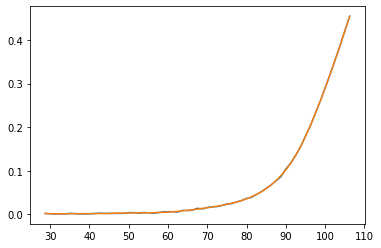

Error: 3.53314038632864e-05


In [179]:
fit_data = np.array([(k, v['delta']) for k, v in data.items()])
strikes, deltas = fit_data[:, 0], abs(fit_data[:, 1])
coefs, stats = poly.polyfit(strikes, deltas, 15, full=True)
ffit = poly.polyval(strikes, coefs)
res, _, _, _ = stats
plt.plot(strikes, deltas)
plt.plot(strikes, ffit)
plt.show()
print('Error: {}'.format(res[0]))

In [219]:
val = pd.DataFrame(fit_data)
val.columns = ['strike', 'delta']
val

,strike,delta
0,28.75,-0.001723
1,30.00,-0.001281
2,31.25,-0.000745
3,32.50,-0.000770
4,33.75,-0.000795
...,...,...
57,101.25,-0.320829
58,102.50,-0.353071
59,103.75,-0.385863
60,105.00,-0.420320


In [226]:
spread = val.loc[(val['strike'] >= 95) & (val['strike'] <= 105)]
spread['delta'] = spread['delta'].abs()

def interpolate_delta(price):
    return poly.polyval(price, coefs)

buy_strike = 95
sell_strike = 105
premium = 3
width = sell_strike - buy_strike
max_loss = premium - width

expected_return = 0
total_prob = 0

for i in range(int(width / 0.1)):
    lo = round(buy_strike + 0.1 * i, 2)
    hi = round(lo + 0.1, 2)
    price = round((lo + hi) / 2, 2)
    
    lo_delta = interpolate_delta(lo)
    hi_delta = interpolate_delta(hi)
    interval_prob = hi_delta - lo_delta
    if interval_prob < 0: interval_prob = 0
    
    interval_return = (price - sell_strike) + premium
    
    expected_return += interval_prob * interval_return
    total_prob += interval_prob
    
prob_below_buy = float(spread.loc[spread['strike'] == buy_strike]['delta'])
prob_above_sell = 1 - float(spread.loc[spread['strike'] == sell_strike]['delta'])
expected_return += prob_below_buy * max_loss
expected_return += prob_above_sell * premium

print(expected_return)

0.06526618371073822
